Historical Market Data:
         Date          Price  SalesVolume
0  2010-01-31  324835.707651   293.288726
1  2010-02-28  293086.784941   223.691646
2  2010-03-31  332384.426905   140.434825
3  2010-04-30  376151.492820   232.827680
4  2010-05-31  288292.331264   151.265916

Customer Data:
   CustomerID  Age IncomeLevel PreferredLocation PreferredPropertyType  \
0           1   42         Low             Urban             Apartment   
1           2   25        High          Suburban                 House   
2           3   38      Medium             Rural                 Condo   
3           4   26      Medium             Urban                 House   
4           5   52        High             Rural             Apartment   

   BudgetRange PurchasingHistory  
0       677007            Rented  
1       828250         Purchased  
2       620452          Inquired  
3       579725         Purchased  
4       192534         Purchased  


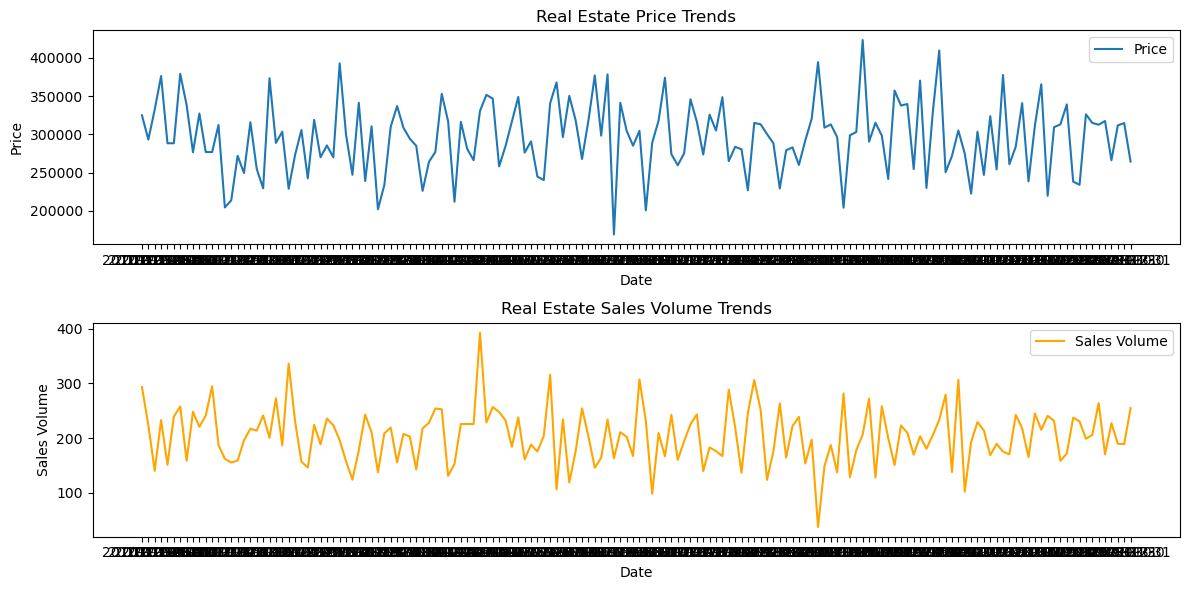


Correlation Matrix:
                Price  SalesVolume
Price        1.000000    -0.062312
SalesVolume -0.062312     1.000000


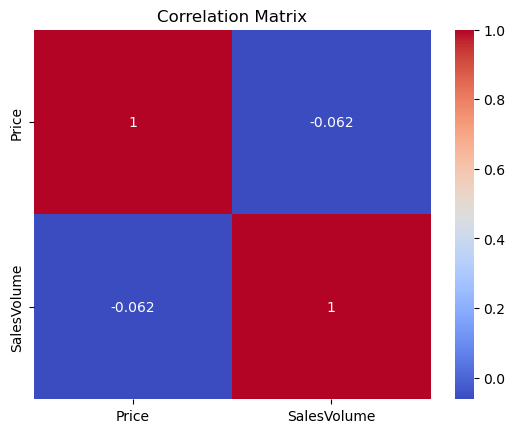

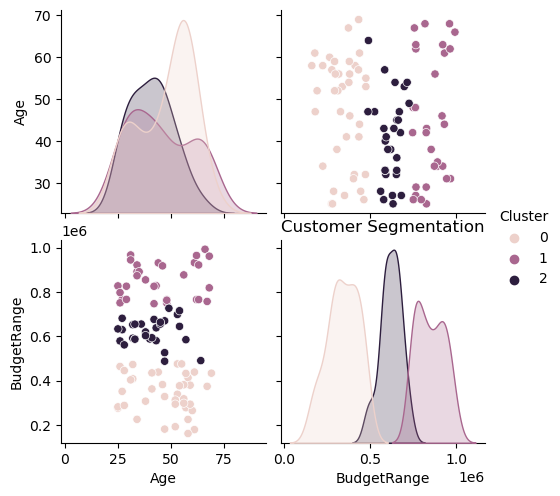


Cluster Centers:
[[4.77750000e+01 3.42986025e+05 1.75000000e-01 3.25000000e-01
  5.00000000e-01 2.00000000e-01 3.75000000e-01 4.25000000e-01
  4.50000000e-01 3.25000000e-01 2.25000000e-01 2.25000000e-01
  5.75000000e-01 2.00000000e-01]
 [4.50322581e+01 8.51296935e+05 2.58064516e-01 1.93548387e-01
  5.48387097e-01 2.90322581e-01 3.22580645e-01 3.87096774e-01
  3.22580645e-01 4.19354839e-01 2.58064516e-01 3.54838710e-01
  5.48387097e-01 9.67741935e-02]
 [4.06551724e+01 6.20504552e+05 1.37931034e-01 2.41379310e-01
  6.20689655e-01 4.13793103e-01 2.75862069e-01 3.10344828e-01
  4.13793103e-01 2.06896552e-01 3.79310345e-01 3.10344828e-01
  4.48275862e-01 2.41379310e-01]]

Mean Squared Error (Market Trend Prediction): 1779666057.7678876


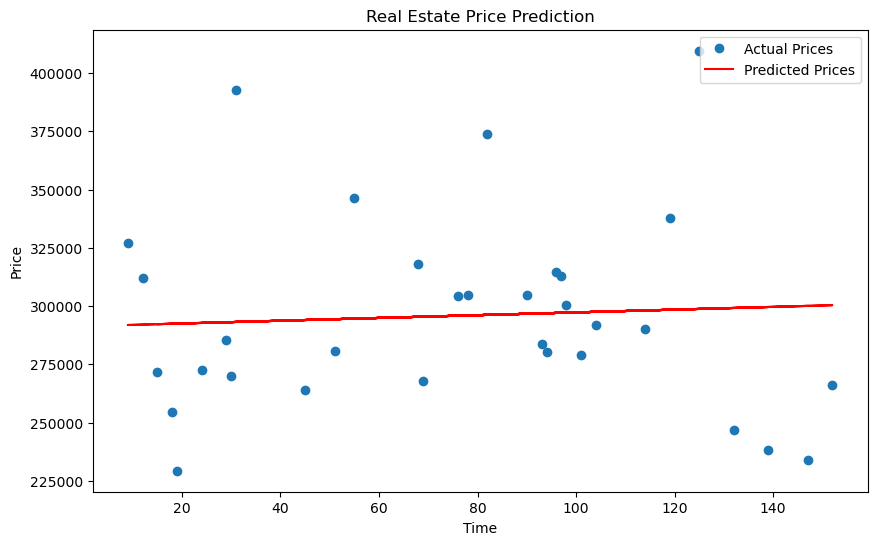


Mean Squared Error (Customer Preference Prediction): 83575539886.54971


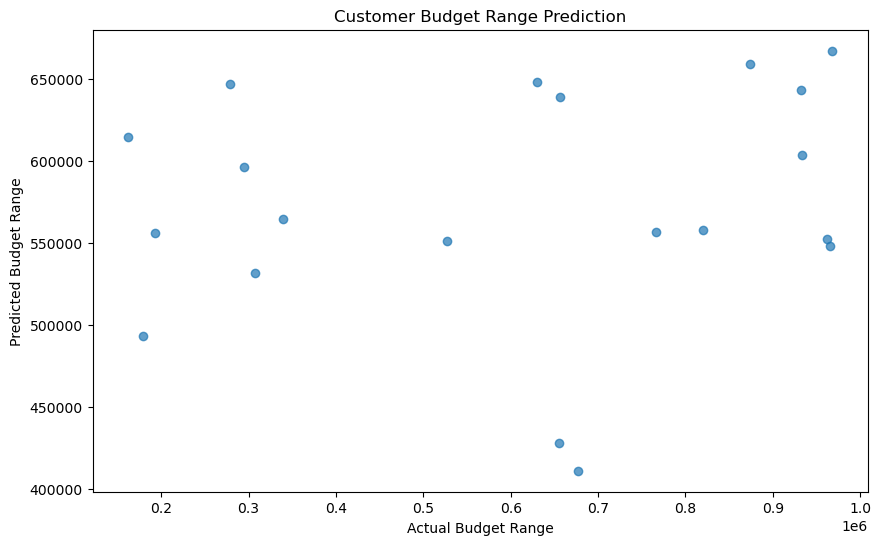

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dummy historical market data
market_data = pd.read_csv('dummy_historical_market_data.csv')
print("Historical Market Data:")
print(market_data.head())

# Load dummy customer data
customer_data = pd.read_csv('dummy_customer_data.csv')
print("\nCustomer Data:")
print(customer_data.head())

# Trend Analysis
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(market_data['Date'], market_data['Price'], label='Price')
plt.title('Real Estate Price Trends')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(market_data['Date'], market_data['SalesVolume'], label='Sales Volume', color='orange')
plt.title('Real Estate Sales Volume Trends')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.legend()

plt.tight_layout()
plt.show()

# Correlation Analysis
correlation_matrix = market_data[['Price', 'SalesVolume']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Customer Segmentation
customer_data_encoded = pd.get_dummies(customer_data, columns=['IncomeLevel', 'PreferredLocation', 'PreferredPropertyType', 'PurchasingHistory'])

kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_encoded.drop('CustomerID', axis=1))

sns.pairplot(customer_data, hue='Cluster', vars=['Age', 'BudgetRange'])
plt.title('Customer Segmentation')
plt.show()

print("\nCluster Centers:")
print(kmeans.cluster_centers_)

# Predictive Modeling

# Market Trend Prediction
X = np.array(range(len(market_data))).reshape(-1, 1)  # Time as a feature
y = market_data['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'\nMean Squared Error (Market Trend Prediction): {mse}')

plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test, 'o', label='Actual Prices')
plt.plot(X_test, y_pred, 'r-', label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Real Estate Price Prediction')
plt.legend()
plt.show()

# Customer Preference Prediction
X = customer_data_encoded.drop(['CustomerID', 'BudgetRange'], axis=1)
y = customer_data_encoded['BudgetRange']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'\nMean Squared Error (Customer Preference Prediction): {mse}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Budget Range')
plt.ylabel('Predicted Budget Range')
plt.title('Customer Budget Range Prediction')
plt.show()
